In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy 
import pandas as pd
import time
import datetime
import os

from scipy import stats

plt.style.use('seaborn-whitegrid')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=24

## Helper functions

In [68]:
def unpaired_observations(A: list, B: list, alpha = 0.1):
   print("==== Unpaired Observations t-Test ====\n")
   print("A = %s\n\nB = %s\n" % (str(A), str(B)))
   print("alpha = %f\n" % alpha)
   
   n_a = len(A)
   n_b = len(B)
   
   xbar_a = sum(A) / n_a 
   xbar_b = sum(B) / n_b 
   
   print("Length of A: %d\nLength of B: %d" % (n_a, n_b))
   print("Average of A: %f\nAverage of B: %f" % (xbar_a, xbar_b))
   
   s_A = sample_standard_deviation(A, xbar_a)
   s_B = sample_standard_deviation(B, xbar_b)
   
   print("Sample standard deviation of A: %f\nSample standard deviation of B: %f" % (s_A, s_B)) 
   
   mean_difference = xbar_a - xbar_b
   std_dev_mean_diff = (((s_A ** 2) / n_a) + ((s_B ** 2) / n_b)) ** 0.5
   
   print("Mean difference: %f\nStandard deviation of the mean difference: %f" % (mean_difference, std_dev_mean_diff))
   
   degrees_of_freedom = effective_deg_freedom(s_A, n_a, s_B, n_b)
   print("Effect number of degrees of freedom: %f" % degrees_of_freedom)
   
   # For p < 0.05, the equivalent to Excel's TINV(0.05, 999) is stats.t.ppf(1 - 0.025, 999).
   t_stat = stats.t.ppf(1 - alpha/2, degrees_of_freedom)
   print("t statistic: %f" % t_stat)
   
   lower_bound_ci = mean_difference - (t_stat * std_dev_mean_diff)
   upper_bound_ci = mean_difference + (t_stat * std_dev_mean_diff)
   
   print("\n\nCONFIDENCE INTERVAL\n( %f , %f )\n" % (lower_bound_ci, upper_bound_ci))
   
   if (lower_bound_ci < 0 and upper_bound_ci > 0):
      print("Interval contains 0. No conclusion can be reached.")
   else:
      print("Interval does NOT contain 0.")
   
   print("\n*** ALPHA WAS SET TO %f ***" % alpha)

def sample_standard_deviation(X: list, xbar: float) -> float:
   return ( (sum([x**2 for x in X]) - (len(X) * (xbar**2))) / (len(X) - 1) )**0.5

def effective_deg_freedom(s_a: float, n_a: float, s_b: float, n_b: float) -> float:
   numerator = (((s_a ** 2)/n_a ) + ((s_b**2)/n_b))**2
   denom_left = (1 / (n_a - 1)) * ( ((s_a ** 2) / n_a) ** 2)
   denom_right = (1 / (n_b - 1)) * ( ((s_b ** 2) / n_b) ** 2)
   denom = denom_left + denom_right
   return (numerator / denom) - 2

## Set up the folders

In [69]:
FIBONACCI_ROOT = "fibonacci"
MERGESORT_ROOT = "mergesort"

WUKONG_DC_FOLDER = "wukongdc"
WUKONG2_FOLDER = "wukong2"

WUKONGDC_FIBONACCI_FILENAME = "fibonacci_%d_bench.csv"
WUKONG2_FIBONACCI_FILENAME = "wukong2_fibonacci_%d_bench.csv"

WUKONG2_MS_FILENAME = "wukong2_mergesort_%d_bench.csv"
WUKONGDC_MS_FILENAME = "mergesort_%d_bench.csv"

## Load Fibonacci data

In [111]:
fibonacci_problem_sizes = [8,12,16]

wukong2_fib_dataframes = {}
wukongdc_fib_dataframes = {}

# Wukong2 DataFrames
wukong2_directory = os.path.join(os.path.join(FIBONACCI_ROOT, WUKONG2_FOLDER))
for problem_size in fibonacci_problem_sizes:
    filename = os.path.join(wukong2_directory, WUKONG2_FIBONACCI_FILENAME % problem_size)
    df = pd.read_csv(filename)
    wukong2_fib_dataframes[problem_size] = df

# Wukong Divide-and-Conquer DataFrames
wukongdc_directory = os.path.join(os.path.join(FIBONACCI_ROOT, WUKONG_DC_FOLDER))
for problem_size in fibonacci_problem_sizes:
    filename = os.path.join(wukongdc_directory, WUKONGDC_FIBONACCI_FILENAME % problem_size)
    df = pd.read_csv(filename)
    wukongdc_fib_dataframes[problem_size] = df

## Load merge sort data

In [115]:
mergesort_problem_sizes = [100, 250, 500, 1000, 2048, 4096, 8192]

def load_merge_sort_data():
    wukong2_ms_dataframes = {}
    wukongdc_ms_dataframes = {}

    # Wukong2 DataFrames
    wukong2_directory = os.path.join(os.path.join(MERGESORT_ROOT, WUKONG2_FOLDER))
    for problem_size in mergesort_problem_sizes:
        filename = os.path.join(wukong2_directory, WUKONG2_MS_FILENAME % problem_size)
        df = pd.read_csv(filename)
        wukong2_ms_dataframes[problem_size] = df

    # Wukong Divide-and-Conquer DataFrames
    wukongdc_directory = os.path.join(os.path.join(MERGESORT_ROOT, WUKONG_DC_FOLDER))
    for problem_size in mergesort_problem_sizes:
        filename = os.path.join(wukongdc_directory, WUKONGDC_MS_FILENAME % problem_size)
        df = pd.read_csv(filename)
        wukongdc_ms_dataframes[problem_size] = df
    
    return wukong2_ms_dataframes, wukongdc_ms_dataframes

wukong2_ms_dataframes, wukongdc_ms_dataframes = load_merge_sort_data()

## Fibonacci graphs

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

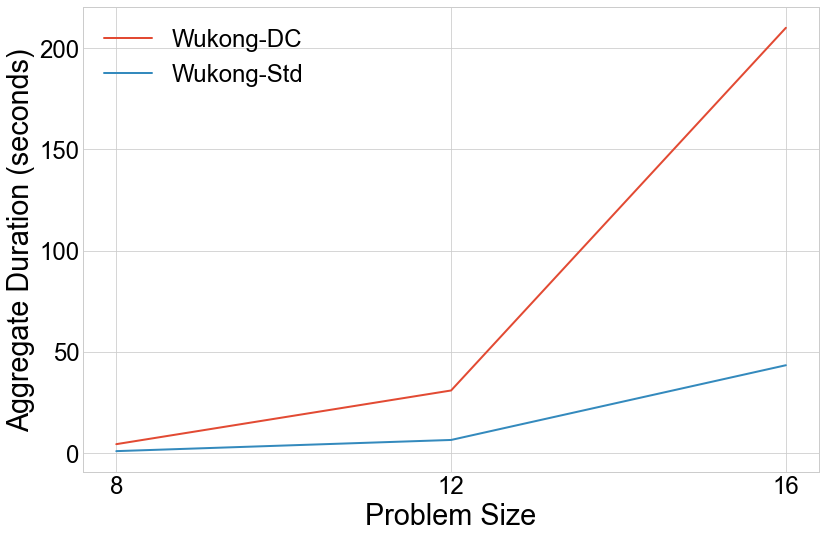

In [109]:
wukong_dc_time_averages = []
wukong2_time_averages = []
wukong_dc_cost_averages = []
wukong2_cost_averages = []
wukong_dc_num_lambdas_averages = []
wukong2_num_lambdas_averages = []
wukong_dc_agg_dur_averages = []
wukong2_agg_dur_averages = []

for problem_size in fibonacci_problem_sizes:
    wukong_dc_df = wukongdc_fib_dataframes[problem_size]
    wukong2_df = wukong2_fib_dataframes[problem_size]
    
    wukong_dc_time = wukong_dc_df["time"]
    wukong2_time = wukong2_df["time"]
    wukong_dc_cost = wukong_dc_df["cost"]
    wukong2_cost = wukong2_df["cost"]
    
    wukong_dc_num_lambdas = wukong_dc_df["num_lambdas"]
    wukong2_num_lambdas = wukong2_df["num_lambdas"]
    wukong_dc_agg_dur = wukong_dc_df["aggregate_duration"]
    wukong2_agg_dur = wukong2_df["aggregate_duration"]    
    
    wukong_dc_time_averages.append(np.mean(wukong_dc_time.values))
    wukong2_time_averages.append(np.mean(wukong2_time.values))
    wukong_dc_cost_averages.append(np.mean(wukong_dc_cost.values))
    wukong2_cost_averages.append(np.mean(wukong2_cost.values))  
    
    wukong_dc_num_lambdas_averages.append(np.mean(wukong_dc_num_lambdas.values))
    wukong2_num_lambdas_averages.append(np.mean(wukong2_num_lambdas.values))
    wukong_dc_agg_dur_averages.append(np.mean(wukong_dc_agg_dur.values))
    wukong2_agg_dur_averages.append(np.mean(wukong2_agg_dur.values))       
        
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_time_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_time_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylabel("Average Runtime (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_time.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_cost_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_cost_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylabel("Average Cost (USD)")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_cost.pdf")


plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_num_lambdas_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_num_lambdas_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylabel("Number of Lambdas")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_num_lambdas.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_agg_dur_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_agg_dur_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylabel("Aggregate Duration (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_agg_dur.pdf")

## Merge Sort

C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3258299001.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3258299001.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3258299001.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)


len(x_values): 7
len(mergesort_problem_sizes): 7
[100, 250, 500, 1000, 2048, 4096, 8192]


C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3258299001.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

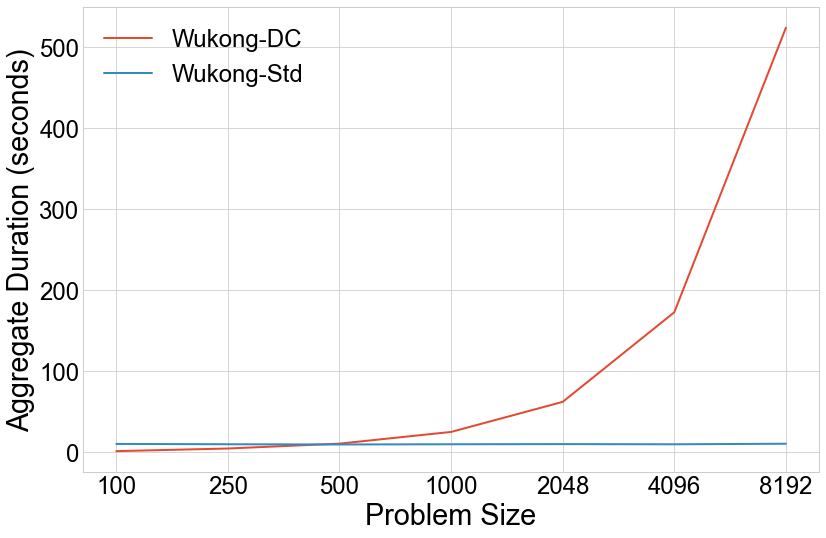

In [126]:
wukong2_ms_dataframes, wukongdc_ms_dataframes = load_merge_sort_data()

wukong_dc_time_averages = []
wukong2_time_averages = []
wukong_dc_cost_averages = []
wukong2_cost_averages = []
wukong_dc_num_lambdas_averages = []
wukong2_num_lambdas_averages = []
wukong_dc_agg_dur_averages = []
wukong2_agg_dur_averages = []

for problem_size in mergesort_problem_sizes:
    wukong_dc_df = wukongdc_ms_dataframes[problem_size]
    wukong2_df = wukong2_ms_dataframes[problem_size]
    
    wukong_dc_time = wukong_dc_df["time"]
    wukong2_time = wukong2_df["time"]
    wukong_dc_cost = wukong_dc_df["cost"]
    wukong2_cost = wukong2_df["cost"]
    
    wukong_dc_num_lambdas = wukong_dc_df["num_lambdas"]
    wukong2_num_lambdas = wukong2_df["num_lambdas"]
    wukong_dc_agg_dur = wukong_dc_df["aggregate_duration"]
    wukong2_agg_dur = wukong2_df["aggregate_duration"]    
    
    wukong_dc_time_averages.append(np.mean(wukong_dc_time.values))
    wukong2_time_averages.append(np.mean(wukong2_time.values))
    wukong_dc_cost_averages.append(np.mean(wukong_dc_cost.values))
    wukong2_cost_averages.append(np.mean(wukong2_cost.values))  
    
    wukong_dc_num_lambdas_averages.append(np.mean(wukong_dc_num_lambdas.values))
    wukong2_num_lambdas_averages.append(np.mean(wukong2_num_lambdas.values))
    wukong_dc_agg_dur_averages.append(np.mean(wukong_dc_agg_dur.values))
    wukong2_agg_dur_averages.append(np.mean(wukong2_agg_dur.values))       
        
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
x_values = np.arange(len(mergesort_problem_sizes)) #[i+1 for i in range(len(mergesort_problem_sizes))]
ax.plot(x_values, wukong_dc_time_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_time_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylabel("Average Runtime (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_time.pdf")

print("len(x_values): " + str(len(x_values)))
print("len(mergesort_problem_sizes): " + str(len(mergesort_problem_sizes)))
print(mergesort_problem_sizes)

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, wukong_dc_cost_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_cost_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylabel("Average Cost (USD)")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_cost.pdf")


plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, wukong_dc_num_lambdas_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_num_lambdas_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylabel("Number of Lambdas")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_num_lambdas.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, wukong_dc_agg_dur_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_agg_dur_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylabel("Aggregate Duration (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_agg_dur.pdf")

## Merge Sort, varying the SEQUENTIAL_THRESHOLD parameter

C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/1601097951.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(sequential_thresholds)
C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/1601097951.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(sequential_thresholds)
C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/1601097951.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(sequential_thresholds)
C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/1601097951.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(sequential_thresholds)


[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[0 1 2 3 4 5 6 7 8 9]
10
10


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

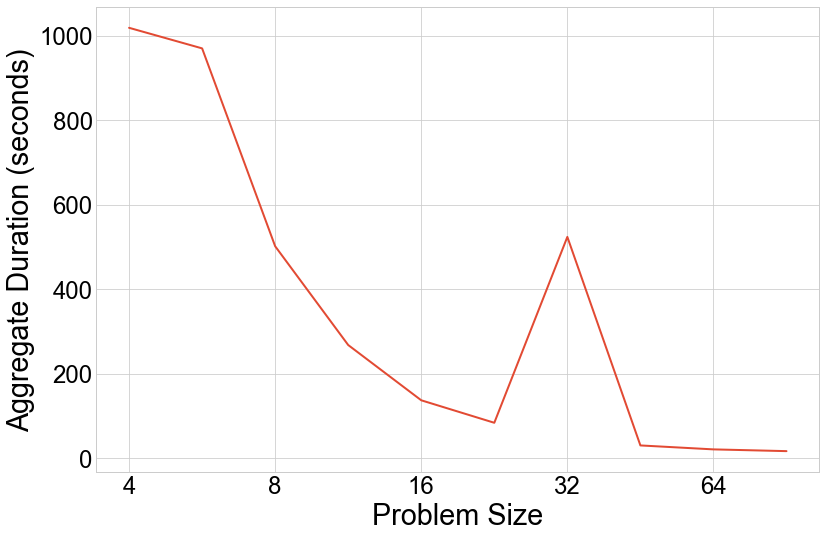

In [134]:
seq_thresh_dfs = {}
sequential_thresholds = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
directory = "wukongdc_seq_tests"
filename_base = os.path.join(MERGESORT_ROOT, directory)
filename_base = os.path.join(filename_base, "mergesort_8196_seq=%d_bench.csv")

for sequential_threshold in sequential_thresholds:
    filename = filename_base % sequential_threshold
    df = pd.read_csv(filename)
    seq_thresh_dfs[sequential_threshold] = df

times, costs, num_lambdas, agg_durations = [],[],[],[]

for sequential_threshold in sequential_thresholds:
    df = seq_thresh_dfs[sequential_threshold]
    
    _times = df["time"]
    _costs = df["cost"]
    _num_lambdas = df["num_lambdas"]
    _agg_durs = df["aggregate_duration"]    
    
    times.append(np.mean(_times.values))
    costs.append(np.mean(_costs.values))
    num_lambdas.append(np.mean(_num_lambdas.values))
    agg_durations.append(np.mean(_agg_durs.values))      
        
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
x_values = np.arange(len(sequential_thresholds))
ax.plot(x_values, times)
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylabel("Average Runtime (seconds)")
plt.tight_layout()
plt.savefig("mergesort_time_seq_thresh.pdf")

print(sequential_thresholds)
print(x_values)
print(len(sequential_thresholds))
print(len(x_values))

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, costs)
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylabel("Average Cost (USD)")
plt.tight_layout()
plt.savefig("mergesort_cost_seq_thresh.pdf")


plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, num_lambdas)
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylabel("Number of Lambdas")
plt.tight_layout()
plt.savefig("mergesort_num_lambdas_seq_thresh.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, agg_durations)
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylabel("Aggregate Duration (seconds)")
plt.tight_layout()
plt.savefig("mergesort_agg_dur_seq_thresh.pdf")

## Testing for statistical significance

In [26]:
for problem_size in problem_sizes:
    print("================ PROBLEM SIZE: %d ================" % problem_size)
    wukong_dc_df = wukongdc_fib_dataframes[problem_size]
    wukong2_df = wukong2_fib_dataframes[problem_size]
    
    wukong_dc_time = wukong_dc_df["time"]
    wukong2_time = wukong2_df["time"]
    
    unpaired_observations(wukong_dc_time.values, wukong2_time.values)
    
#     diff_time = wukong_dc_time - wukong2_time
    
#     average_difference = np.mean(diff_time.values)
#     std_diff = sample_standard_deviation(diff_time.values, average_difference)
#     alpha = 0.05
    

================ PROBLEM SIZE: 8 ================
==== Unpaired Observations t-Test ====

A = [1.13225532 1.00522637 1.21127272 1.12225223 1.05423832 1.02423024
 1.04423451 1.07324219 1.02423072 1.0542376  1.10324836 0.97521949
 1.03423285 1.10324836 1.11325073 1.08324409 0.99422383 1.00522637
 1.11225057 0.9842217 ]

B = [0.37285161 0.45067477 0.44905853 0.39442444 0.50022078 0.40079737
 0.45015931 0.39967322 0.39541674 0.45527649 0.39486504 0.45044374
 0.40108109 0.4513154  0.44998956 0.44425631 0.45128298 0.40003395
 0.50126672 0.35004377]

alpha = 0.100000

Length of A: 20
Length of B: 20
Average of A: 1.062689
Average of B: 0.428157
Sample standard deviation of A: 0.060110
Sample standard deviation of B: 0.040110
Mean difference: 0.634533
Standard deviation of the mean difference: 0.016159
Effect number of degrees of freedom: 31.120369
t statistic: 1.695317


CONFIDENCE INTERVAL
( 0.607139 , 0.661927 )

Interval does NOT contain 0.

*** ALPHA WAS SET TO 0.100000 ***
==============